# Simplex Projection of Climate/Vegetation

Sugihara & May 1990: https://www.nature.com/articles/344734a0

In [47]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import os
import seaborn as sns
import itertools

In [48]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'

In [254]:
def simplex_error(in_dir, file, var1, var2, train, test):
    param_range = list(itertools.product(list(range(1,11)), repeat = 2)) #combination of pairs with repeat values
    
    output = []
    #pd.DataFrame(list(range(1,101)), columns=['E'])

    for i in param_range:  
        simplex_result = Simplex(pathIn = in_dir, dataFile = file, lib = train, pred = test, E = i[0], Tp = i[1], columns = var1, target = var2, showPlot = False)
        error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))
        MAE = list(error.values())[0]
        RMSE = list(error.values())[1]
        rho = list(error.values())[2]
        output.append(rho) #change depending on error parameter of interest
        
    return output
        
        
def simplex_error_df(error_lists):
    
    for i in error_lists:
        chunks = np.array_split(np.array(i), 10)
        df = pd.DataFrame(np.vstack(chunks))
        #df_E = df.insert(0, 'E', list(range(1,11)))
    return df
    
    

In [255]:
param_range = list(itertools.product(list(range(1,11)), repeat = 2))
len(param_range)

100

In [256]:
tst = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
#tst
simplex_error_df([tst])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 33 and the array at index 4 has size 32

In [215]:
spx_ndvi_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
spx_ndvi_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
spx_ndvi_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')

spx_precip_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'P', 'P', '1 100', '101 522')
spx_precip_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'P', 'P', '1 100', '101 522')
spx_precip_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'P', 'P', '1 100', '101 522')

spx_sm_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'SM', 'SM', '1 100', '101 522')
spx_sm_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'SM', 'SM', '1 100', '101 522')
spx_sm_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'SM', 'SM', '1 100', '101 522')

spx_lst_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'LST', 'LST', '1 100', '101 522')
spx_lst_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'LST', 'LST', '1 100', '101 522')
spx_lst_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'LST', 'LST', '1 100', '101 522')

spx_temp_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')
spx_temp_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')
spx_temp_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')

spx_et_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'refET', 'refET', '1 100', '101 522')
spx_et_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'refET', 'refET', '1 100', '101 522')
spx_et_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'refET', 'refET', '1 100', '101 522')


In [220]:
spx_ndvi_croplands_rho_df = simplex_error_df(spx_ndvi_croplands_rho)
spx_ndvi_grasslands_rho_df = simplex_error_df(spx_ndvi_grasslands_rho)
spx_ndvi_savannas_rho_df = simplex_error_df(spx_ndvi_savannas_rho)

spx_precip_croplands_rho_df = simplex_error_df(spx_precip_croplands_rho)
spx_precip_grasslands_rho_df = simplex_error_df(spx_precip_grasslands_rho)
spx_precip_savannas_rho_df = simplex_error_df(spx_precip_savannas_rho)

spx_sm_croplands_rho_df = simplex_error_df(spx_sm_croplands_rho)
spx_sm_grasslands_rho_df = simplex_error_df(spx_sm_grasslands_rho)
spx_sm_savannas_rho_df = simplex_error_df(spx_sm_savannas_rho)

spx_lst_croplands_rho_df = simplex_error_df(spx_lst_croplands_rho)
spx_lst_grasslands_rho_df = simplex_error_df(spx_lst_grasslands_rho)
spx_lst_savannas_rho_df = simplex_error_df(spx_lst_savannas_rho)

spx_temp_croplands_rho_df = simplex_error_df(spx_temp_croplands_rho)
spx_temp_grasslands_rho_df = simplex_error_df(spx_temp_grasslands_rho)
spx_temp_savannas_rho_df = simplex_error_df(spx_temp_savannas_rho)

spx_et_croplands_rho_df = simplex_error_df(spx_et_croplands_rho)
spx_et_grasslands_rho_df = simplex_error_df(spx_et_grasslands_rho)
spx_et_savannas_rho_df = simplex_error_df(spx_et_savannas_rho)


# Plot Simplex Projection Error Across Variables and Land Cover Types

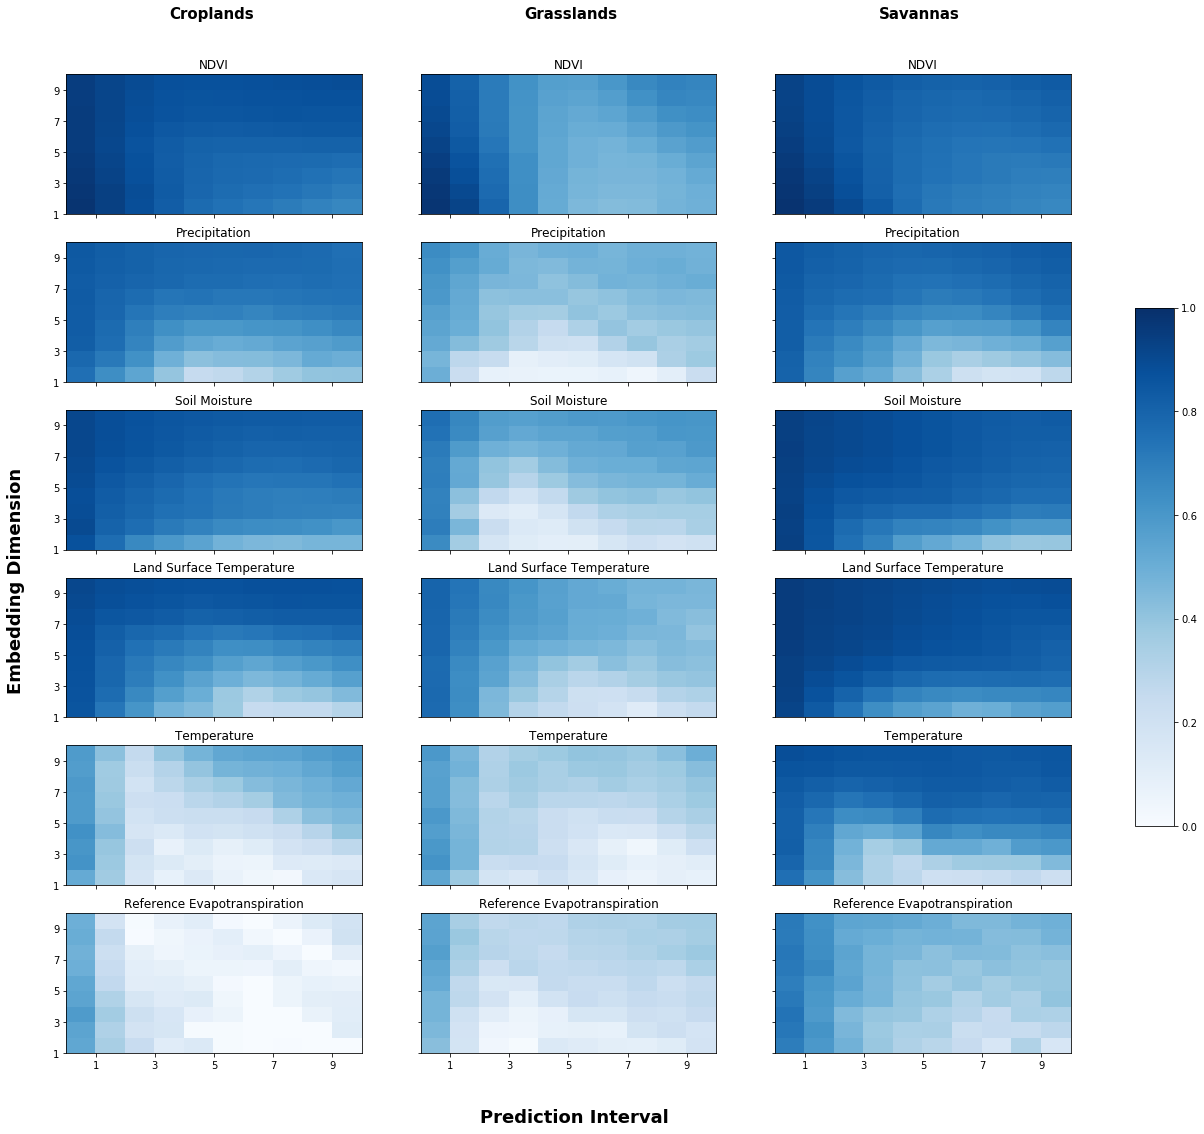

In [229]:
fig, axs = plt.subplots(6, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'SM', 'LST', 'Temp', 'RefET']
lc_list = ['Croplands', 'Grasslands', 'Savannas ']


df_list = [spx_ndvi_croplands_rho_df, spx_ndvi_grasslands_rho_df, spx_ndvi_savannas_rho_df, 
          spx_precip_croplands_rho_df, spx_precip_grasslands_rho_df, spx_precip_savannas_rho_df, 
          spx_sm_croplands_rho_df, spx_sm_grasslands_rho_df, spx_sm_savannas_rho_df, 
          spx_lst_croplands_rho_df, spx_lst_grasslands_rho_df, spx_lst_savannas_rho_df, 
          spx_temp_croplands_rho_df, spx_temp_grasslands_rho_df, spx_temp_savannas_rho_df, 
          spx_et_croplands_rho_df, spx_et_grasslands_rho_df, spx_et_savannas_rho_df]

for i, d in enumerate(zip(df_list)):
    xlim = [0,10]
    ylim = [1,10]
    xticks = [*range(1,11, 2)] # the * unpacks range to list
    yticks = [*range(1,11, 2)]
    data = d[0]
    im = axs[i].pcolor(data, cmap = 'Blues', vmin = 0, vmax  = 1)
    axs[i].pcolor(data, cmap = 'Blues', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    
    if i<3:
        axs[i].set_title('NDVI')
    if 2<i<6:
        axs[i].set_title('Precipitation')
    if 5<i<9:
        axs[i].set_title('Soil Moisture')
    if 8<i<12:
        axs[i].set_title('Land Surface Temperature')
    if 11<i<15:
        axs[i].set_title('Temperature')
    if i>14:
        axs[i].set_title('Reference Evapotranspiration')
    
axs[0].text(0.35, 1.4, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.55, 1.4, 'Grasslands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(2.75, 1.4, 'Savannas', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.4, -6.5, 'Prediction Interval', transform=axs[0].transAxes, size=18, fontweight='bold')
axs[0].text(-0.2, -3.4, 'Embedding Dimension', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)


cbar_ax = fig.add_axes([0.95, .3, .03, .4])
fig.colorbar(im, cax=cbar_ax)

# Extra

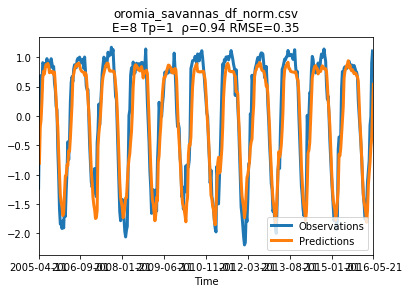

In [83]:
test = Simplex(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_norm.csv', lib = '1 100', pred = '101 500', E = 8, columns = 'SM', target = 'SM', showPlot = True)

In [28]:
test

Time  Observations  Predictions
0    2005-04-11     -1.233318          NaN
1    2005-04-21     -0.208050    -0.803547
2    2005-05-01      0.684396    -0.188613
3    2005-05-11      0.256602    -0.061069
4    2005-05-21      0.538047     0.239225
..          ...           ...          ...
396  2016-04-11     -0.158415    -0.797413
397  2016-04-21     -0.011371    -0.532825
398  2016-05-01      0.901566    -0.379022
399  2016-05-11      1.106891     0.076776
400  2016-05-21           NaN     0.539021

[401 rows x 3 columns]

In [30]:
ComputeError(list(test.Observations), list(test.Predictions))

{'MAE': 0.2614244975440288,
 'RMSE': 0.35493816504457654,
 'rho': 0.9407007557773299}